# Predict the percentage of an student based on the no. of study hours

Simple Linear Regression:

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data Decsription:
--------------------------

Hours - Number of Study hours

Scores - marks scored by students


# Importing Libraries:

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
#'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [15,10]

In [3]:
#Load the dataset
df = pd.read_csv('student_scores.csv')

#display the first 5 records
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data understanding and visualization:

In [4]:
#rows and columns in tha dataset
df.shape

(25, 2)

There 25 rows and 2 columns.

In [5]:
#datatypes of the features
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#checking null values 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null/missing values in the data.

In [21]:
#summary statistics of features
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


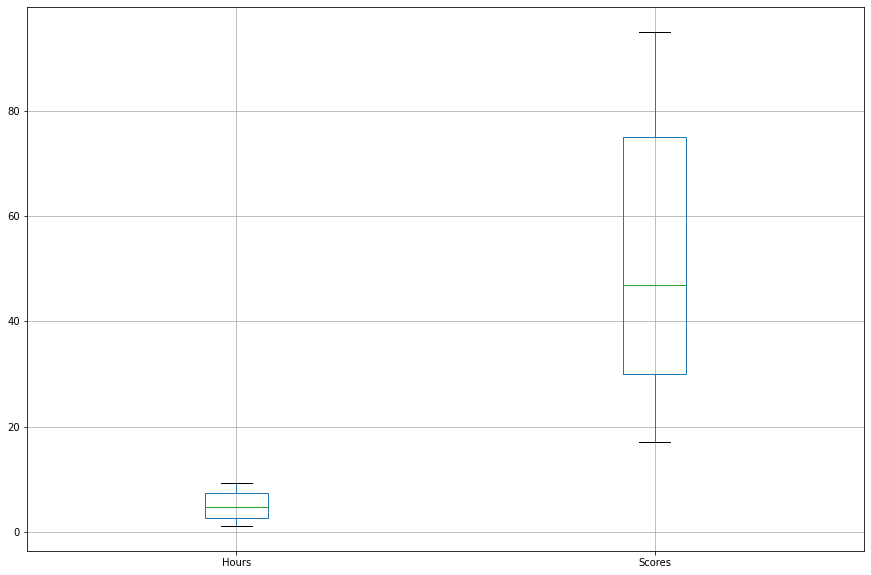

In [13]:
#checking outliers
df.boxplot()

There is no outliers in the data.

In [15]:
#checking correlation between features
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


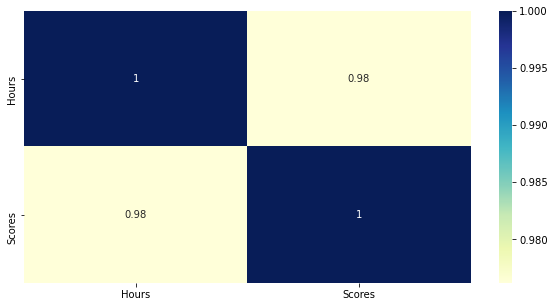

In [62]:
#checking correlation using heatmap
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

Scores and hours has strong positive correlation.

In [20]:
#checking the skewness
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

Scores and hours are slightly right skewed (which is approximately near to zero).

Histograms:


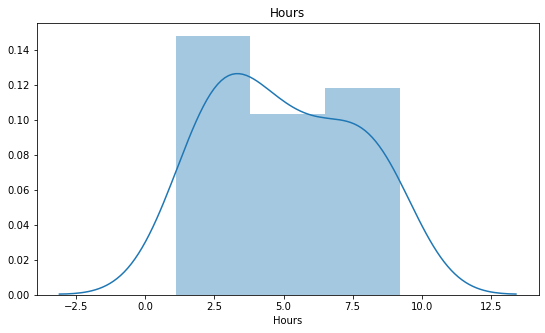

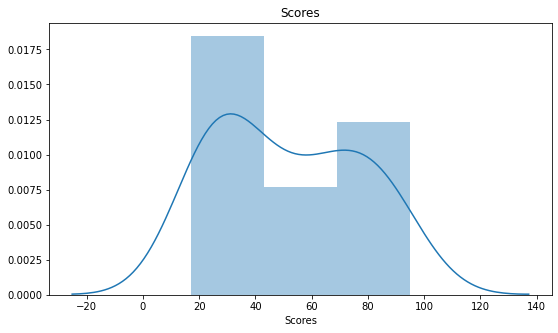

In [19]:
#to check the distribution
def hist(col):
    data = df[col]
    plt.figure(figsize = (9,5))
    sns.distplot(data)
    plt.title(col)
    plt.show()

columns = df.columns

print('Histograms:')
for i in columns:
    hist(i)

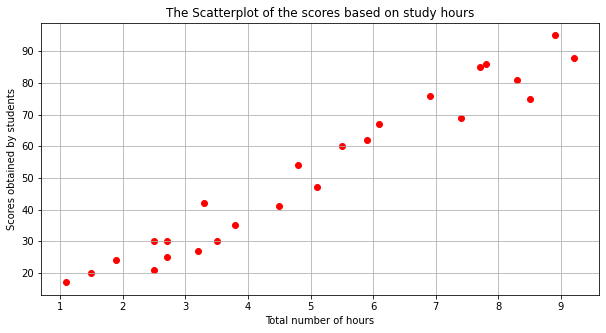

In [28]:
#to check the linear relationship
plt.scatter(x=df['Hours'],y=df['Scores'],color='r')
plt.xlabel("Total number of hours")
plt.ylabel("Scores obtained by students")
plt.title("The Scatterplot of the scores based on study hours")
plt.grid()
plt.show()

There is a positive linear relationship between hours and scores.

# Data preprocessing:

Split the data into independent (predictor) and dependent (Target) variables.

In [58]:
X = df['Hours'].values
y = df['Scores'].values

In [59]:
#reshape the X values
X= X.reshape(-1,1)
# Split data into train, test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

# Model Training:

In [60]:
model = LinearRegression().fit(X_train,y_train)
print('After modeling the data :')
print('b1 (slope) : ',model.coef_ )
print('b0 (Intercept) : ',model.intercept_)

After modeling the data :
b1 (slope) :  [9.81430544]
b0 (Intercept) :  2.6499651894038863


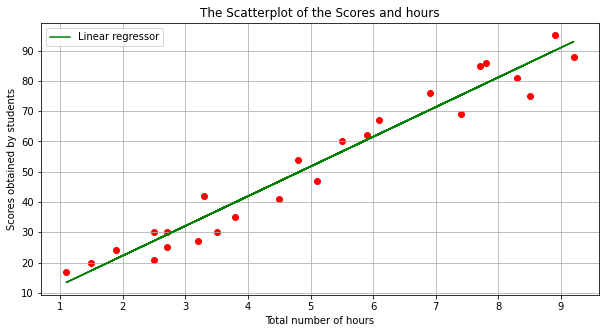

In [63]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color='green',label='Linear regressor')
plt.xlabel("Total number of hours")
plt.ylabel("Scores obtained by students")
plt.title("The Scatterplot of the Scores and hours")
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Model Prediction:

In [64]:
# predicted response vector 
y_pred = model.predict(X_test)

In [65]:
# Comparing Actual vs Predicted
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_model

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


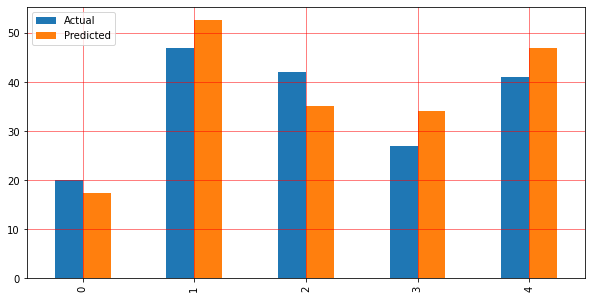

In [77]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df_model.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.legend(loc='upper left')
plt.show()

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [89]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = model.predict(test)
print("No of Hours studied per day = {}".format(hours))
print("Predicted Score if a student studied for 9.25 hrs/ day = {}".format(own_pred[0]))

No of Hours studied per day = 9.25
Predicted Score if a student studied for 9.25 hrs/ day = 93.43229053722452


# Evaluating the model:

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [84]:
train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print('train RMSE:  ', rmse_train)

test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print('test RMSE : ', rmse_test)

train RMSE:   5.2632
test RMSE :  5.8567


In [80]:
#Estimating training and test score
print("Training Score:",model.score(X_train,y_train))
print("Test Score:",model.score(X_test,y_test))

Training Score: 0.95807022445042
Test Score: 0.6683995499740194


In [87]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 5.632881746692995
Mean Squared Error: 34.300750550687425
